# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [4]:
!nvidia-smi

Mon Jul  8 16:54:12 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:17:00.0 Off |                  N/A |
| 30%   30C    P8    32W / 350W |      6MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
| 30%   

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/media/HDD/조홍석/yolov9


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [6]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 10.75 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/media/HDD/조홍석/yolov9/yolov9


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [7]:
!pip install -q roboflow

Reason for being yanked: deprecated, use 4.8.0.76


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [8]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

SyntaxError: invalid syntax (1423324834.py, line 2)

In [ ]:
!ls -la {HOME}/weights

## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
cd yolov9

In [ ]:
%cd {HOME}/yolov9

**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZWm8YLRPWtaYc11D2rkP")
project = rf.workspace("pcbfaultdetection-fygfg").project("fault-detection-ll4am")
version = project.version(6)
dataset = version.download("yolov9")


## Train Custom Model

In [10]:
conda env list

# conda environments:
#
base                  *  /home/dilab03/anaconda3
CLTR                     /home/dilab03/anaconda3/envs/CLTR
GPS                      /home/dilab03/anaconda3/envs/GPS
GPTSoVits                /home/dilab03/anaconda3/envs/GPTSoVits
MPC                      /home/dilab03/anaconda3/envs/MPC
STEERER                  /home/dilab03/anaconda3/envs/STEERER
YHS                      /home/dilab03/anaconda3/envs/YHS
YOLOv6                   /home/dilab03/anaconda3/envs/YOLOv6
YOLOv9                   /home/dilab03/anaconda3/envs/YOLOv9
YOLOv9_clone             /home/dilab03/anaconda3/envs/YOLOv9_clone
bjh                      /home/dilab03/anaconda3/envs/bjh
cnn_autoencoder          /home/dilab03/anaconda3/envs/cnn_autoencoder
cnn_autoencoderEx        /home/dilab03/anaconda3/envs/cnn_autoencoderEx
cnn_insu                 /home/dilab03/anaconda3/envs/cnn_insu
count                    /home/dilab03/anaconda3/envs/count
crowd                    /home/dilab03/anaconda3/envs/cr

In [11]:
conda activate YOLOv9


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [9]:
# %cd {HOME}/yolov9%cd {HOME}/yolov9

# !python train.py \
# --batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/gelan-c.pt \
# --cfg models/detect/gelan-c.yaml \
# --hyp hyp.scratch-high.yaml

# !python train.py \
# --batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/gelan-c.pt \
# --cfg models/detect/gelan-c.yaml \
# --hyp hyp.scratch-high.yaml

# coco/labels/{split}/*.txt
# polygon (1 instance 1 line)
python segment/train.py --workers 8 --device 0 --batch 32  --data ../infireall/infireall/data.yaml --img 640 --cfg models/segment/gelan-c-seg.yaml --weights '조홍석/yolov9/{HOME}/weights/gelan-c-seg.pt' --name gelan-c-seg --hyp hyp.scratch-high.yaml --no-overlap --epochs 300 --close-mosaic 10
python -m torch.distributed.launch --nproc_per_node 4 --master_port 9527 train.py --workers 8 --device 0,1 --sync-bn --batch 128 --data ../infireall/infireall/data.yaml --img 640 --cfg models/segment/gelan-c-seg.yaml --weights 'models/segment/gelan-c-seg.yaml' --name gelan-c-seg --hyp hyp.scratch-high.yaml --min-items 0 --epochs 300 --close-mosaic 15

python segment/train.py --workers 8 --device 0 --batch 16 --data ../5000infire/data.yaml --img 640 --cfg models/detect/yolov9-c.yaml --weights '{HOME}/weights/gelan-c-seg.pt' --name yolov9-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 300 --close-mosaic 15 
python train_dual.py --workers 8 --device 1 --batch 16 --data ../5000infire/data.yaml --img 640 --cfg models/detect/yolov9-c.yaml --weights '{HOME}/weights/yolov9-c.pt' --name yolov9-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 300 --close-mosaic 15 
python train_dual.py --workers 8 --device 1 --batch 16 --data ../5000infire/data.yaml --img 640 --cfg models/detect/yolov9-c.yaml --weights '{HOME}/weights/yolov9-c.pt' --name yolov9-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 300 --close-mosaic 15 
python train.py --workers 8 --device 0 --batch 16 --data ./5000infire/data.yaml --img 640 --cfg models/detect/gelan-c.yaml --weights '{HOME}/weights/gelan-c.pt' --name gelan-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 300 --close-mosaic 15

python segment/train.py --workers 8 --device 0 --batch 16 --data ../5000infire/data.yaml --img 640 --cfg models/segment/gelan-c-seg.yaml --weights '{HOME}/weights/gelan-c-seg.pt' --name yolov9-c --hyp hyp.scratch-high.yaml --epochs 300 --close-mosaic 15
python segment/train.py --workers 8 --device 0 --batch 16 --data ./data/5000infire/data.yaml --img 640 --cfg models/segment/gelan-c-seg.yaml --weights './weights/gelan-c-seg.pt' --name yolov9-c --hyp hyp.scratch-high.yaml --epochs 300 --close-mosaic 15

SyntaxError: invalid syntax (1067155623.py, line 19)

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Device:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
pwd

In [ ]:
!ls ./runs/train/-c_200

In [ ]:
pwd

In [ ]:
from IPython.display import Image

Image(filename="./runs/train/-c_200/confusion_matrix.png", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

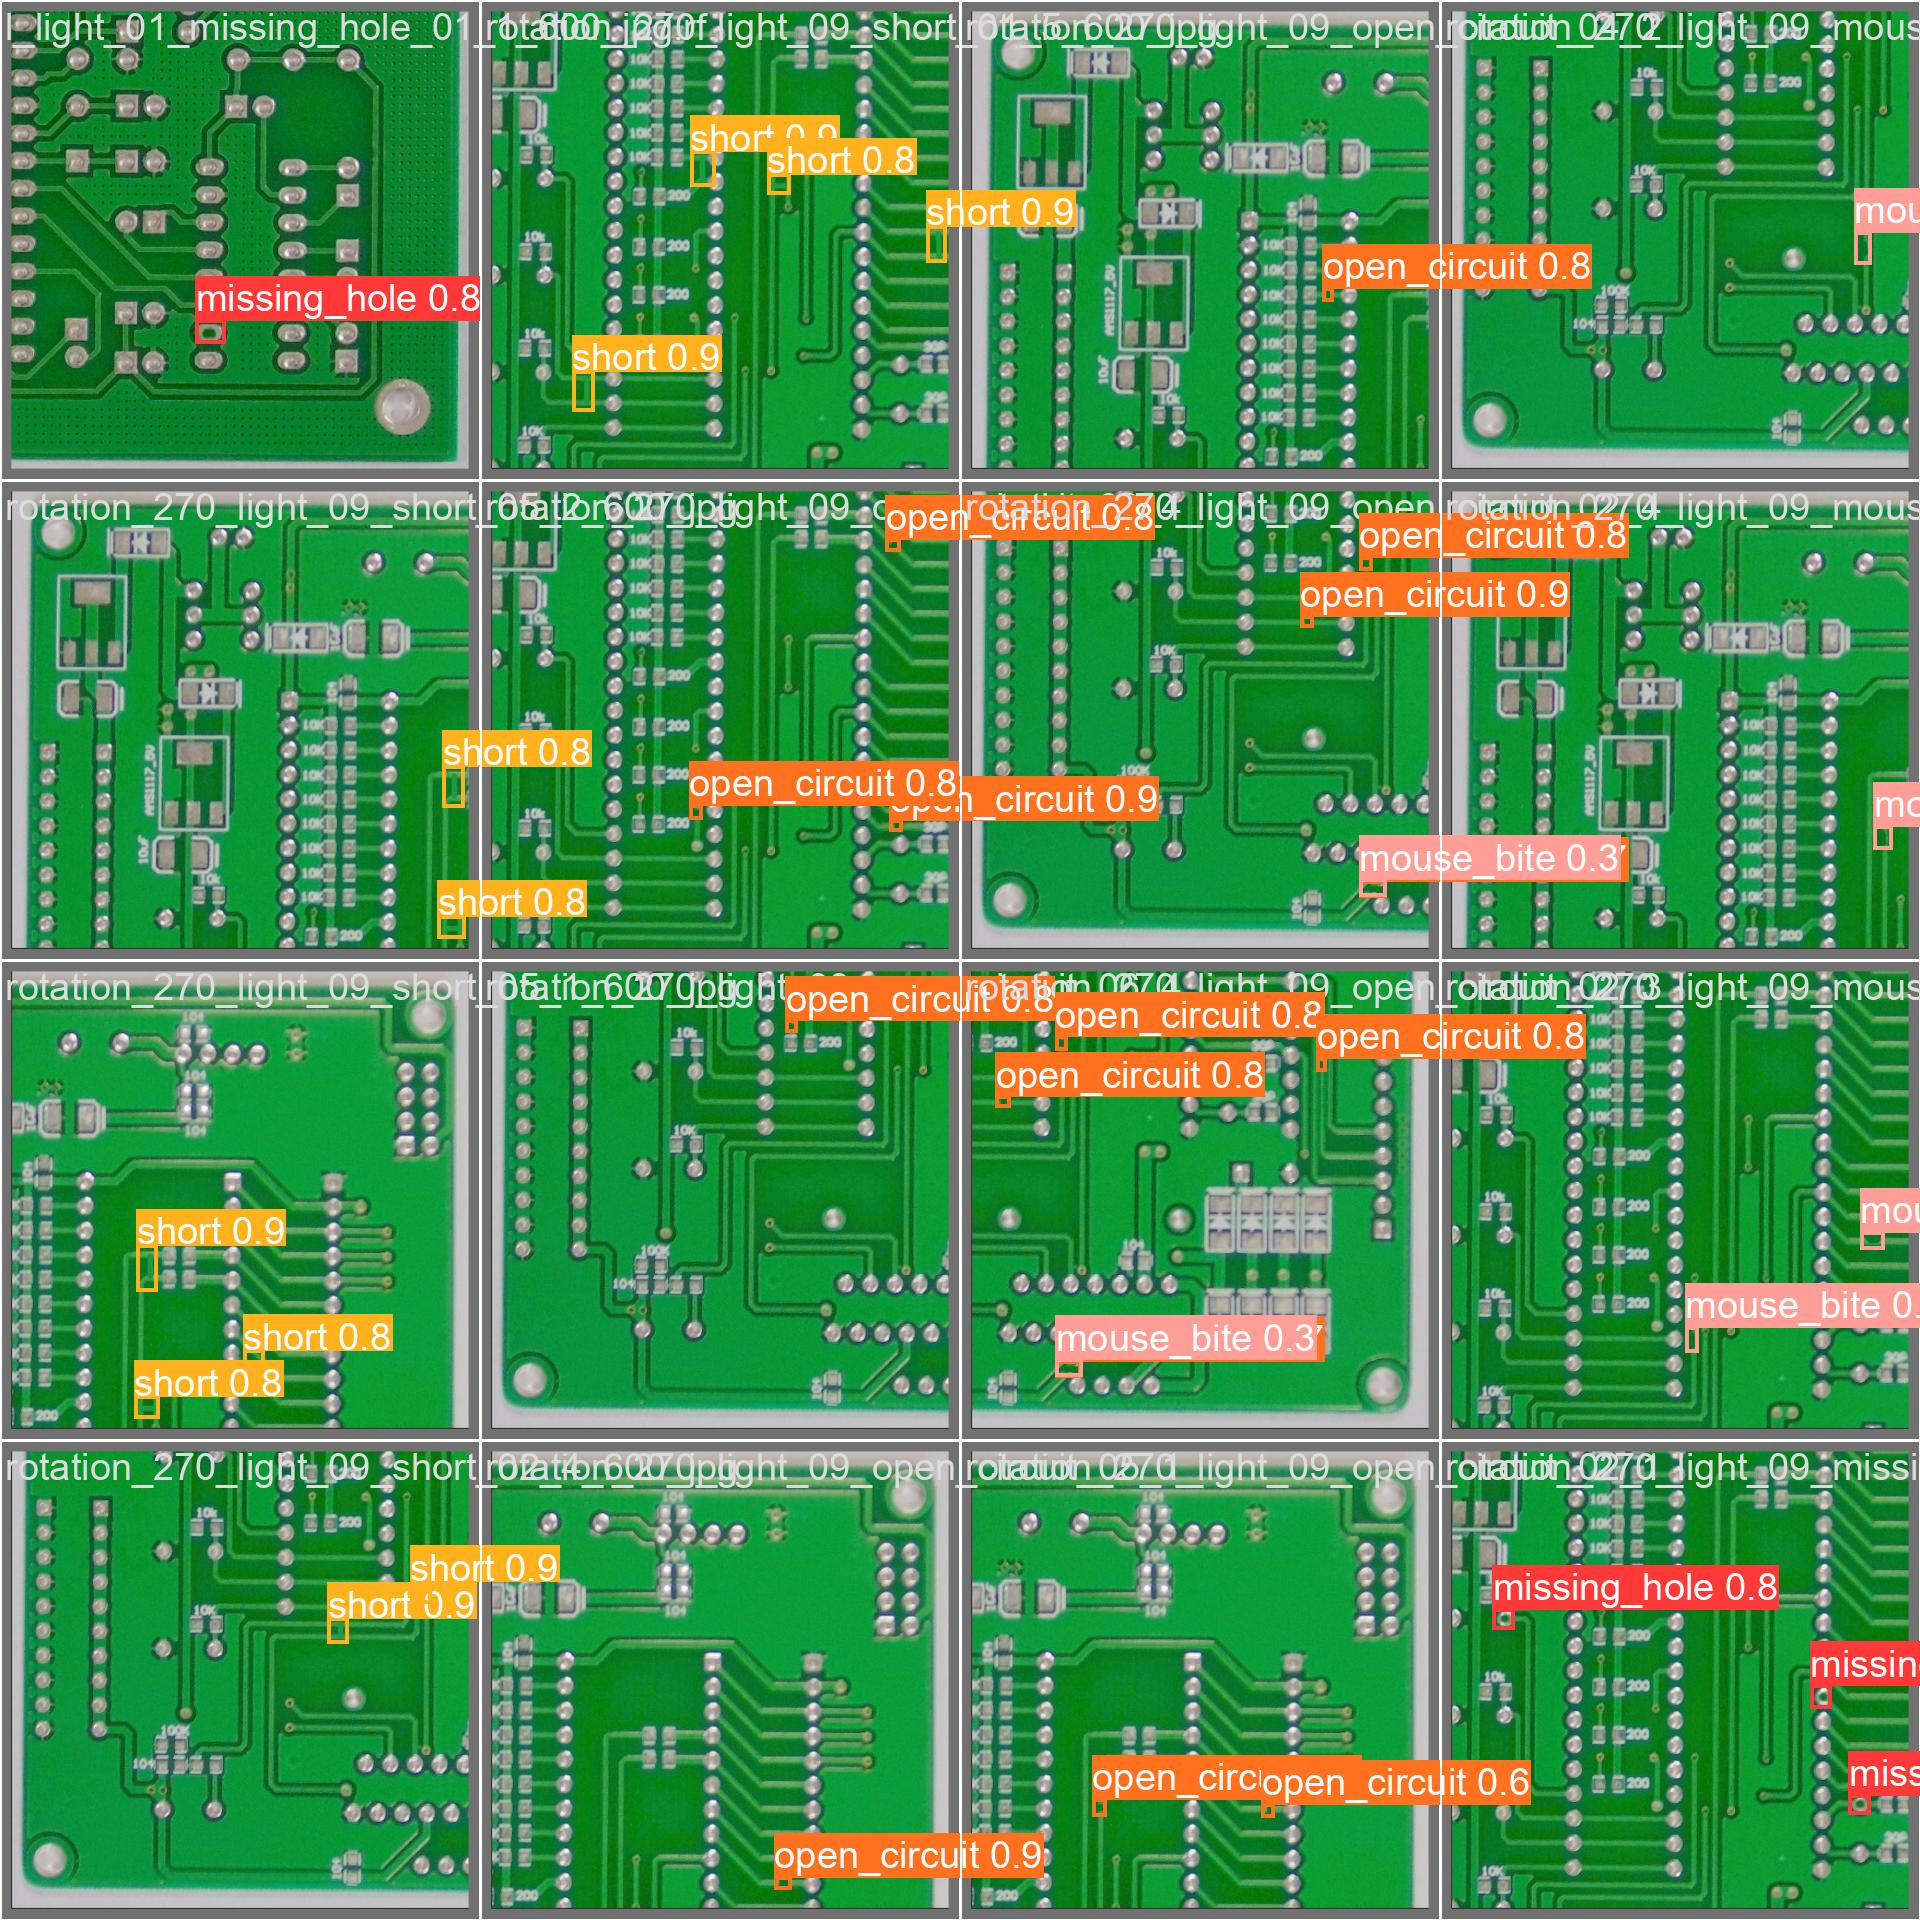

In [18]:
from IPython.display import Image

Image(filename="./runs/train/-c_200/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

python val_dual.py --data ./Fault-Detection-6/data.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 1 --weights './runs/train/yolov9-c_50/weights/best.pt' --save-txt --name yolov9_c_640_val
python val.py --data ./Fault-Detection-6/data.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 1 --weights './gelan-c.pt' --save-text --name gelan_c_640_val
python val.py --data ./Fault-Detection-6/data.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 1 --weights './runs/train/gelan-c_50/weights/best.pt' --save-txt --name gelan_c_640_val

/content/yolov9
val: data=/content/yolov9/football-players-detection-6/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-6/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.22s/it]
                   all         38        905       0.91      0.689      0.759      0.528
                  ball     

## Inference with Custom Model

In [20]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights ./runs/train/-c_200/weights/best.pt \
--source ./Fault-Detection-6/test/images

python detect.py --source './Fault-Detection-6/test/images' --img 640 --device 1 --weights './runs/train/gelan-c_200/weights/best.pt' --name gelan_c_640_detect

detect: weights=['./runs/train/-c_200/weights/best.pt'], source=./Fault-Detection-6/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Traceback (most recent call last):
  File "/media/HDD/조홍석/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/media/HDD/조홍석/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/home/dilab03/anaconda3/lib/python3.11/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/media/HDD/조홍석/yolov9/detect.py", line 67, in run
    device = select_device(device)
             ^^^^^^^^^^^^^^^^^^^^

In [6]:
conda env list

# conda environments:
#
base                  *  /home/dilab03/anaconda3
YOLOv6                   /home/dilab03/anaconda3/envs/YOLOv6
YOLOv9                   /home/dilab03/anaconda3/envs/YOLOv9
cnn_autoencoder          /home/dilab03/anaconda3/envs/cnn_autoencoder
cnn_insu                 /home/dilab03/anaconda3/envs/cnn_insu
crowd                    /home/dilab03/anaconda3/envs/crowd
ein                      /home/dilab03/anaconda3/envs/ein
seld_net                 /home/dilab03/anaconda3/envs/seld_net
seld_w2v_dvc             /home/dilab03/anaconda3/envs/seld_w2v_dvc
seongyun                 /home/dilab03/anaconda3/envs/seongyun
swin_sugi                /home/dilab03/anaconda3/envs/swin_sugi


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# Assuming `model` and `target_layers` are defined
cam = GradCAM(model='조홍석/yolov9/runs/train/yolov9-c_200/weights/best.pt', target_layers=[13, 16, 19, 22], use_cuda=True)

# Generate heatmap
target_category = 'missing_hole', 'mouse_bite', 'short', 'spur', 'spurious_copper', 'open_circuit'    # Define if specific class; otherwise, highest scoring class
grayscale_cam = cam(input_tensor=image_tensor, target_category=target_category)

# Overlay heatmap on original image
heatmap = show_cam_on_image(np.array(image) / 255., grayscale_cam)

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

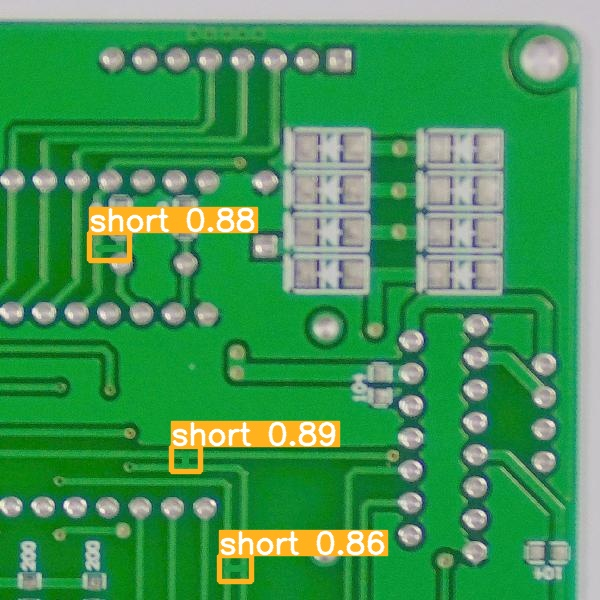

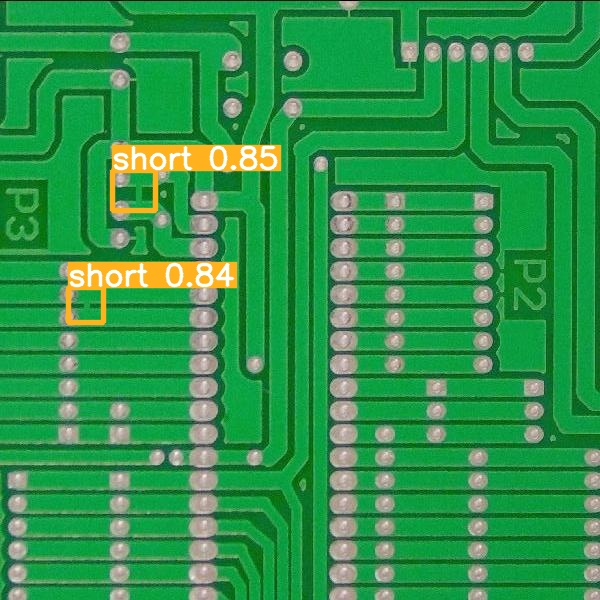

In [24]:
import glob

from IPython.display import Image, display

for image_path in glob.glob('./runs/detect/c_200_detect/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/6
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/model/6


**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

··········


**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

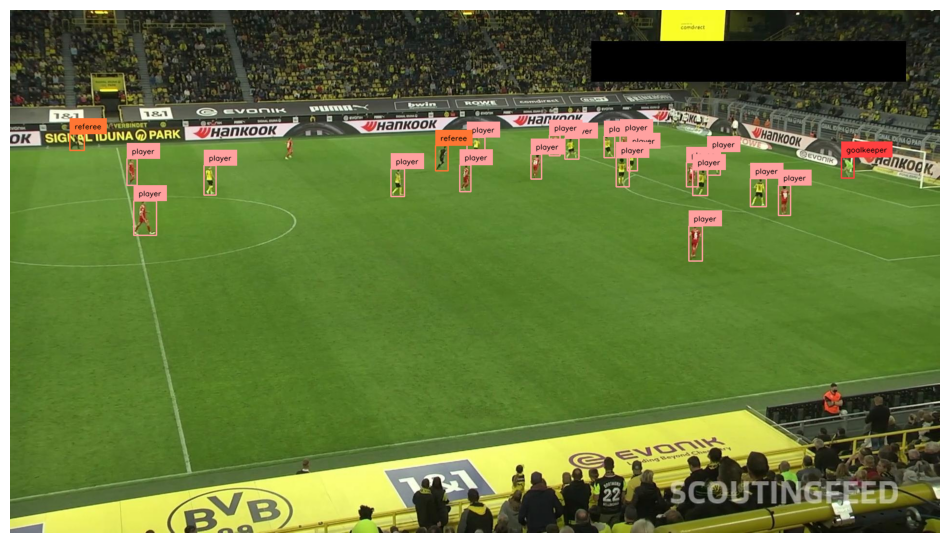

In [ ]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [1]:
pwd

'/media/HDD/조홍석'

In [6]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2
import numpy as np

# Assuming `model` is your YOLO model and `target_layer` is your last conv layer
cam = GradCAM(model= './yolov9/runs/train/yolov9-c_200/weights/best.pt', target_layers=[13, 16, 19, 22], use_cuda=True)

# Prepare your input image
# image should be np.array of shape (height, width, 3)
input_tensor = preprocess_image(image, mean=[0,0,0], std=[1,1,1], resize=True)

# Get the cam mask
grayscale_cam = cam(input_tensor=input_tensor, targets=None)
grayscale_cam = grayscale_cam[0, :]

# In this line "image" should be in the range [0, 1] and of shape (height, width, 3)
visualization = show_cam_on_image(image, grayscale_cam, use_rgb=True)

# Now visualize or save your result
cv2.imshow('Grad-CAM', visualization)
cv2.waitKey(0)

Exception ignored in: <function BaseCAM.__del__ at 0x7f637191cdc0>
Traceback (most recent call last):
  File "/home/dilab03/anaconda3/envs/YOLOv6/lib/python3.8/site-packages/pytorch_grad_cam/base_cam.py", line 192, in __del__
    self.activations_and_grads.release()
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


AttributeError: 'str' object has no attribute 'eval'